# Customer Segmentation using RFM Analysis

In [81]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from datetime import datetime as dt
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [82]:
# Loading Crime Dataset
df = pd.read_csv('data.csv',encoding='unicode_escape')

In [83]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 1) Data Overview

In [84]:
# Displaying the number of rows and columns of the dataset
df.shape

(541909, 8)

In [85]:
# Displaying the types of Datatypes 
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [86]:
# Displaying the all the columns of the Dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [87]:
# Displaying the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [88]:
# checking for any null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [89]:
# Calculating the missing value percentage
missing_percentage = df.isnull().mean() * 100

In [90]:
print("Percentage of Missing Values per Column:\n", missing_percentage[missing_percentage > 0])

Percentage of Missing Values per Column:
 Description     0.268311
CustomerID     24.926694
dtype: float64


In [91]:
# Checking for any duplicate values in the dataset
df.duplicated().sum()

np.int64(5268)

In [92]:
# Dropping duplicate values in the dataset
df.drop_duplicates(inplace=True)

In [93]:
# Checking for any Negative values in the Quantity Columns
cnt = df['Quantity']<0
cnt.sum()

np.int64(10587)

In [94]:
# Checking for any Negative values in the Unit Price Columns
cnt1 = df['UnitPrice']<0
cnt1.sum()

np.int64(2)

In [95]:
# Displaying the Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.00,13939.00,15145.00,16784.00,18287.0


In [96]:
# Dropping any null Values
df.dropna(inplace=True)

In [97]:
# Filtering the quantity columns for values less than 0
df = df[~df['Quantity']<0]

In [98]:
# Performing outlier removal on the DataFrame for the columns 'Quantity' and 'UnitPrice'.
check_items = ['Quantity','UnitPrice']
for i in check_items:
    low,high = df[i].quantile([0,0.95])
    mask = df[i].between(low,high)
    df = df[mask]

In [99]:
# Converting date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str)

In [100]:
# Creating time period using the minimum and maximum dates from the 'InvoiceDate' column.
time_period = {
    "Start Date": df['InvoiceDate'].min(),
    "End Date": df['InvoiceDate'].max()
}

In [101]:
print("Maximum and Minimum Time Period:",time_period)

Maximum and Minimum Time Period: {'Start Date': Timestamp('2010-12-01 08:26:00'), 'End Date': Timestamp('2011-12-09 12:50:00')}


## 2) Customer Analysis

In [102]:
# Find Unique Customers
unique_customers = df['CustomerID'].nunique()

print("Unique Number of Customers in the dataset:",unique_customers)

Unique Number of Customers in the dataset: 4215


In [103]:
total_customers = len(df)

In [104]:
# This section calculates the total and unique number of customers.
sizes = [total_customers - unique_customers, unique_customers]
labels = ['Duplicate Customers', 'Unique Customers']
explode = (0.1, 0)

In [105]:
def custom_autopct(pct):
    return '{:.2f}%'.format(pct) if pct > 0 else ''

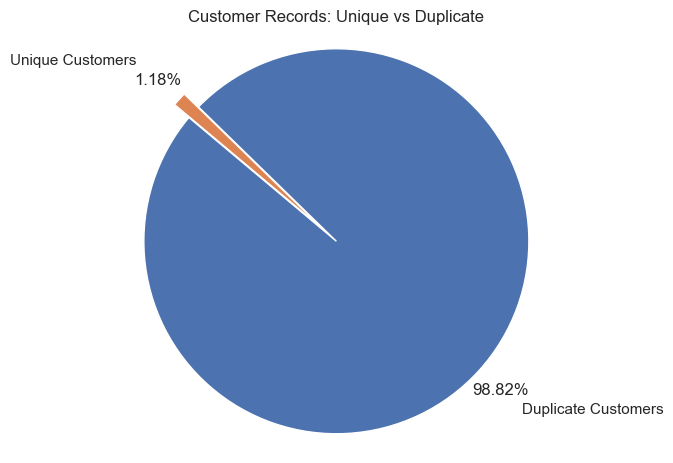

In [106]:
# Plotting a pie chart to visualize customer records: Unique vs Duplicate
plt.pie(sizes, labels=labels, autopct=lambda pct: custom_autopct(pct), startangle=140, 
        pctdistance=1.15, labeldistance=1.30, explode=explode)
plt.axis('equal')
plt.title('Customer Records: Unique vs Duplicate')
plt.show()


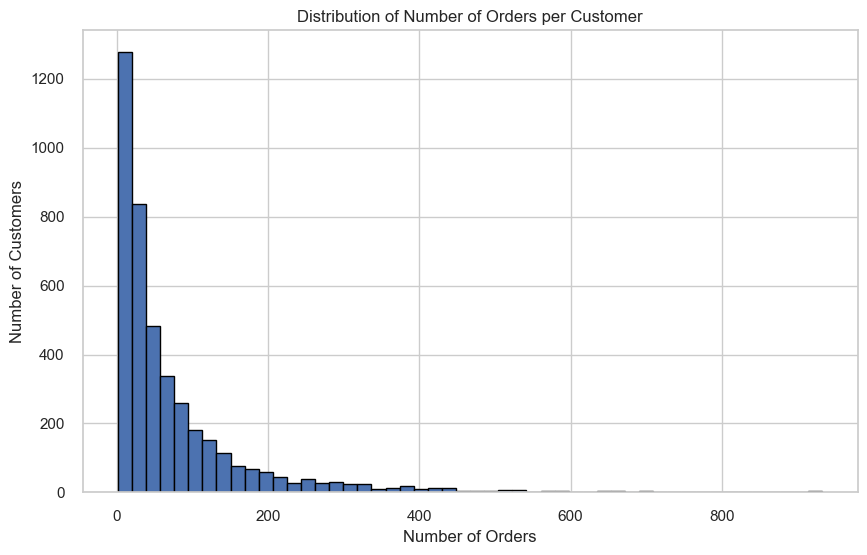

In [107]:
# Displaying the Distribution of Number of Orders per customer
customer = df.groupby('CustomerID')['StockCode'].count()
customer = customer[customer.values<1000]
plt.figure(figsize=(10, 6))
plt.hist(customer.values, bins=50,edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

In [108]:
# Analyzing Customer Orders
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

top_5_customers_by_orders = orders_per_customer.sort_values(ascending=False).head(5)

In [109]:
# Creating top 5 customer dataframe
top_5_customers_df = pd.DataFrame({'CustomerID': top_5_customers_by_orders.index, 
                                   'Orders': top_5_customers_by_orders.values})

In [110]:
top_5_customers_df 

,CustomerID,Orders
0,12748.0,201
1,14911.0,195
2,17841.0,123
3,15311.0,91
4,14606.0,90


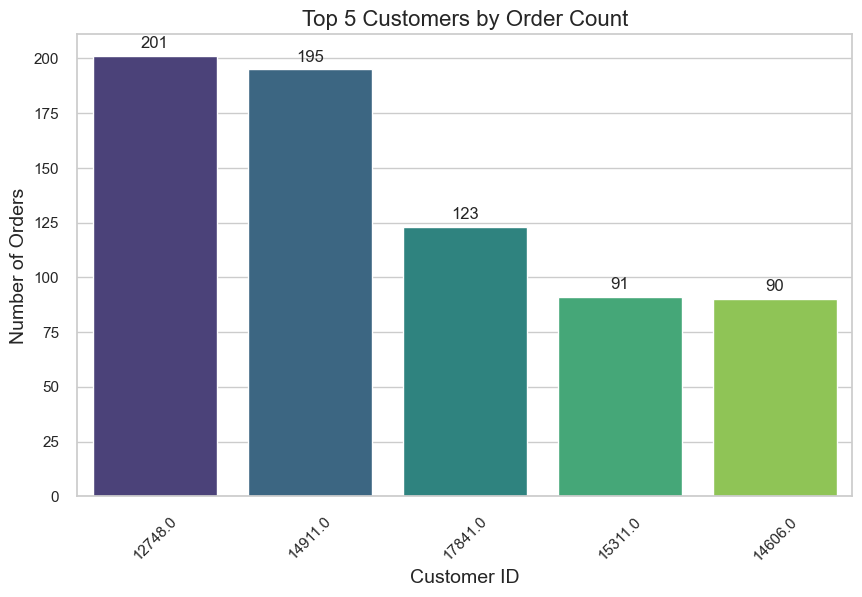

In [111]:
# Displaying the top 5 customers by Order Count
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='CustomerID', y='Orders', data=top_5_customers_df, palette='viridis')

plt.title('Top 5 Customers by Order Count', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()


## 3) Product Analysis

In [112]:
# Top 10 most frequently purchased products
top_10_products = df['Description'].value_counts().head(10)

# Average price of products in the dataset
average_price = df['UnitPrice'].mean()

# Generating revenue by product
df['Revenue'] = df['Quantity'] * df['UnitPrice']
revenue_by_product = df.groupby('Description')['Revenue'].sum()

# Finding the product that generates the highest revenue
highest_revenue_product = revenue_by_product.idxmax()
highest_revenue = revenue_by_product.max()

print ("\nThe Top 10 products are:\n\n",top_10_products)
print ("\nAverage price of products in the dataset:\n\n" ,average_price)
print ("\nThe product that generates the highest revenue is:\n\n" ,(highest_revenue_product, highest_revenue))


The Top 10 products are:

 Description
WHITE HANGING HEART T-LIGHT HOLDER    1909
JUMBO BAG RED RETROSPOT               1379
PARTY BUNTING                         1271
ASSORTED COLOUR BIRD ORNAMENT         1243
LUNCH BAG RED RETROSPOT               1227
SET OF 3 CAKE TINS PANTRY DESIGN      1123
LUNCH BAG  BLACK SKULL.               1040
SPOTTY BUNTING                         977
LUNCH BAG SPACEBOY DESIGN              968
PACK OF 72 RETROSPOT CAKE CASES        946
Name: count, dtype: int64

Average price of products in the dataset:

 2.465995333046914

The product that generates the highest revenue is:

 ('WHITE HANGING HEART T-LIGHT HOLDER', np.float64(51472.01))


In [113]:
# Creating a DataFrame for the top 10 most frequently purchased products
top_10_products_df = pd.DataFrame({'Product': top_10_products.index, 
                                   'Frequency': top_10_products.values})

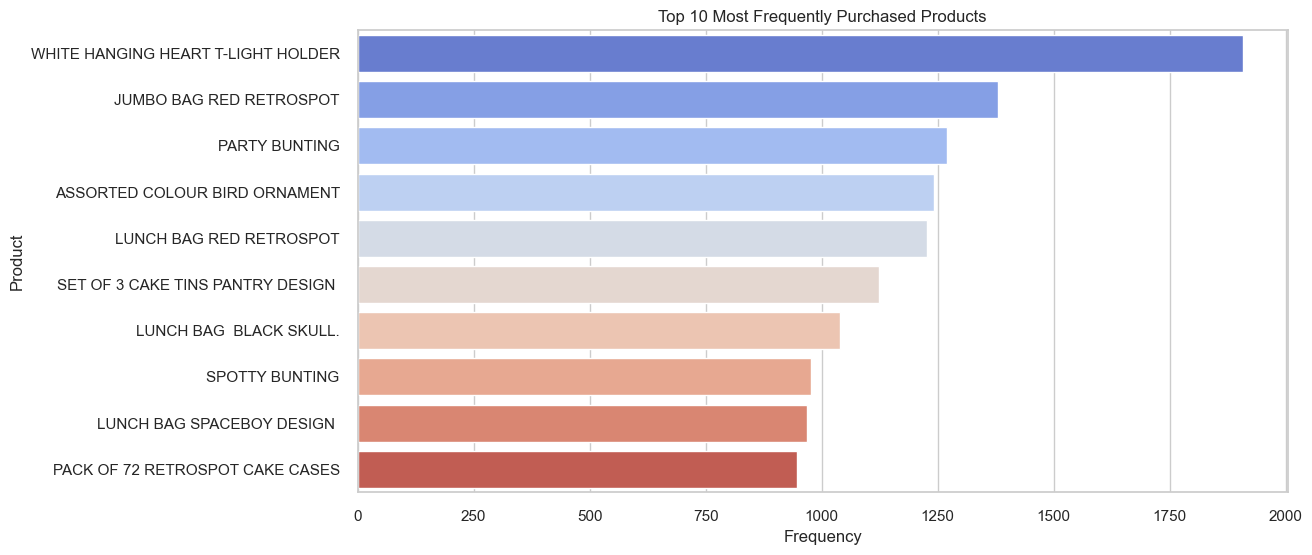

In [114]:
# Plotting bar chart to visualize top 10 most frequently purchased products
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Product', data=top_10_products_df, palette='coolwarm')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Frequency')
plt.ylabel('Product')
plt.show()

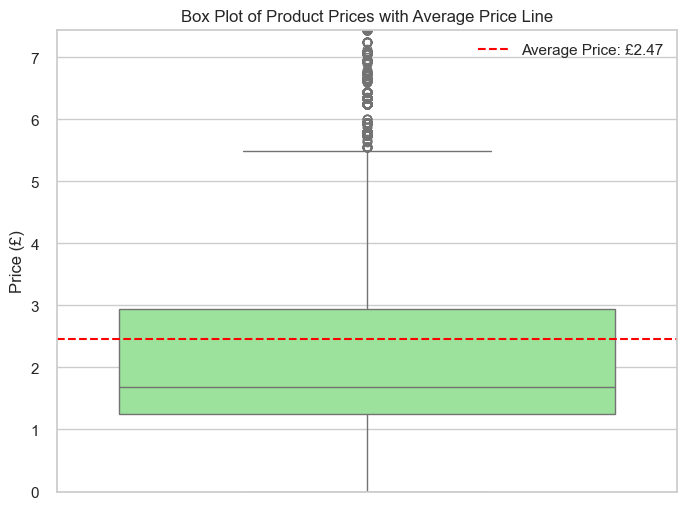

In [115]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['UnitPrice'], color='lightgreen')
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average Price: £{average_price:.2f}')
plt.title('Box Plot of Product Prices with Average Price Line')
plt.ylabel('Price (£)')
plt.ylim(0, df['UnitPrice'].quantile(0.95))  # Limiting y-axis to 95th percentile for better visibility
plt.legend()
plt.show()

## 4) Time Analysis

In [116]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Finding the most common day of the week for orders
most_common_day = df['DayOfWeek'].value_counts().idxmax()

# Finding the most common hour of the day for orders
most_common_hour = df['HourOfDay'].value_counts().idxmax()

print(f"Most Common Day: {most_common_day}")
print(f"Most Common Hour: {most_common_hour}")


Most Common Day: Thursday
Most Common Hour: 12


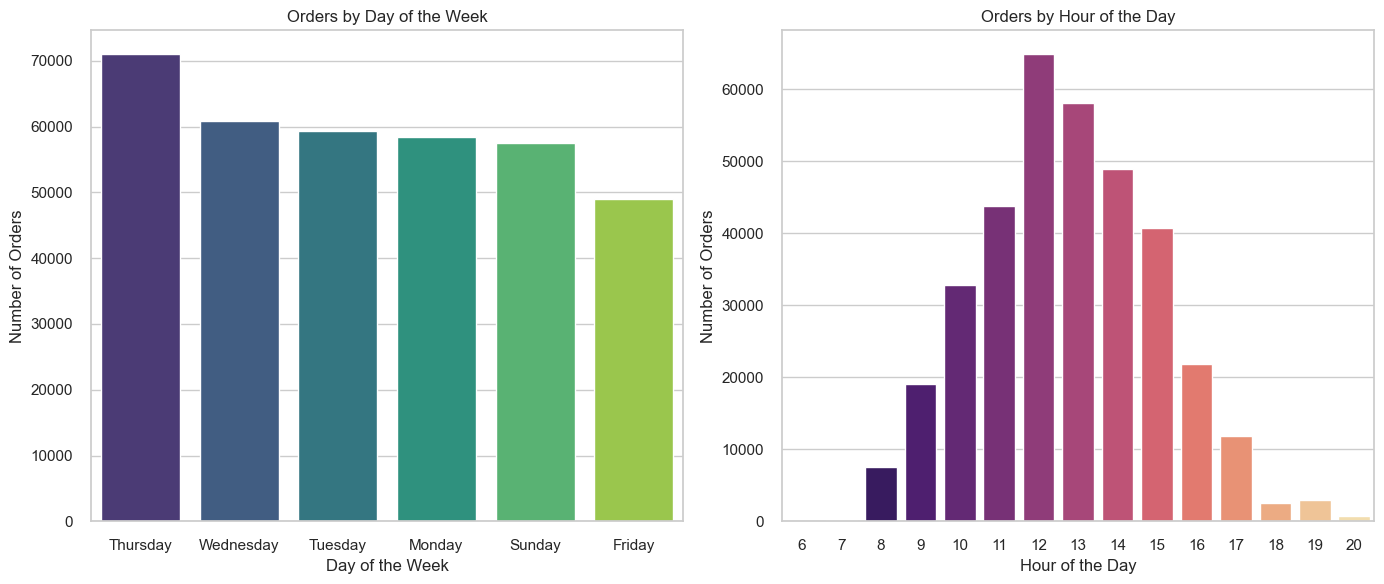

In [117]:
# Aggregating data for visualization
day_order_counts = df['DayOfWeek'].value_counts()
hour_order_counts = df['HourOfDay'].value_counts()

# Visualization
plt.figure(figsize=(14, 6))

# Day of the Week Orders
plt.subplot(1, 2, 1)
sns.barplot(x=day_order_counts.index, y=day_order_counts.values, palette='viridis')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Hour of the Day Orders
plt.subplot(1, 2, 2)
sns.barplot(x=hour_order_counts.index, y=hour_order_counts.values, palette='magma')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

In [118]:
# Sorting the data by CustomerID and InvoiceDate
data_sorted = df.sort_values(['CustomerID', 'InvoiceDate'])

# Calculate the difference in InvoiceDate for each consecutive order by the same customer
data_sorted['NextInvoiceDate'] = data_sorted.groupby('CustomerID')['InvoiceDate'].shift(-1)
data_sorted['ProcessingTime'] = (data_sorted['NextInvoiceDate'] - data_sorted['InvoiceDate'])

# Exclude the last order of each customer as it does not have a next order to compare with
processing_times = data_sorted['ProcessingTime'].dropna()

# Calculate the average processing time across all orders
average_processing_time = processing_times.mean()

print(f"Average Order Processing Time: {average_processing_time}")

Average Order Processing Time: 1 days 13:16:02.473785613


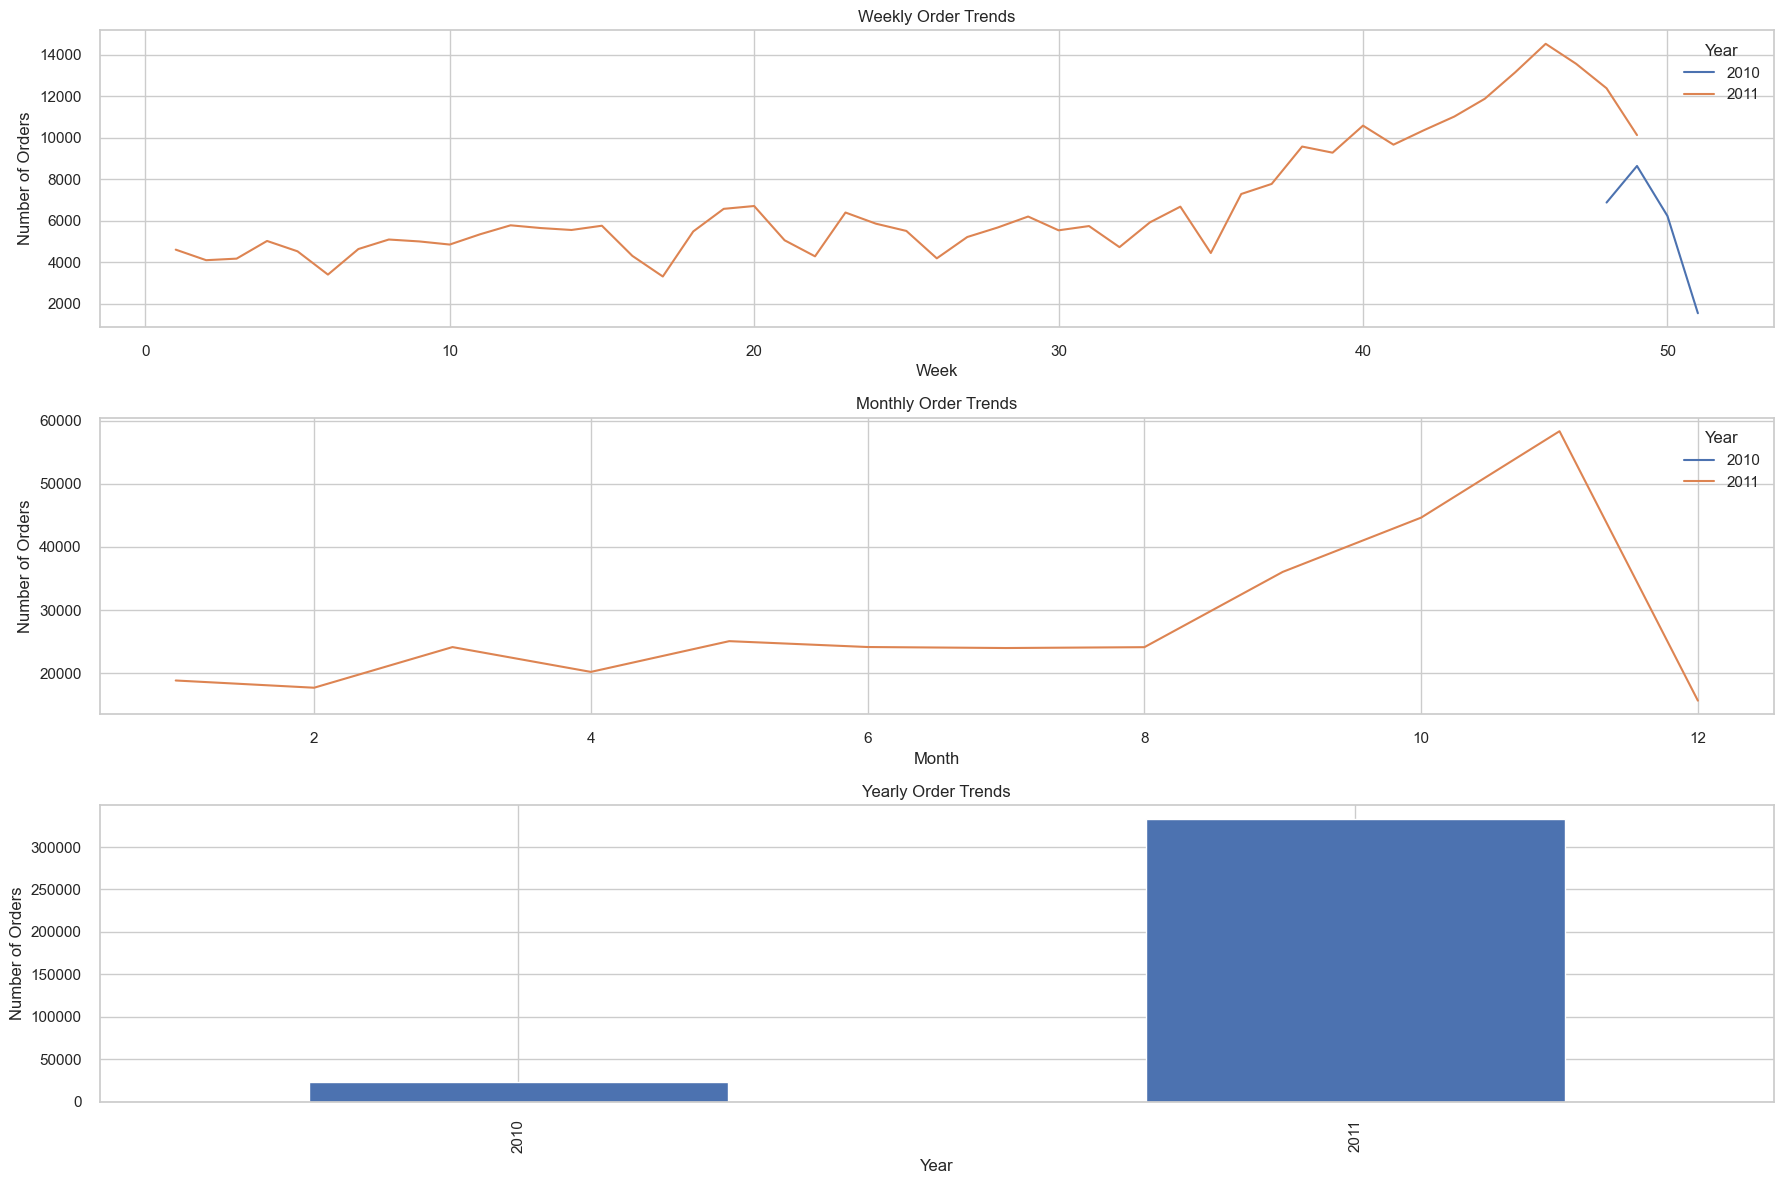

In [119]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting week, month, and year
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# Aggregating data for weekly, monthly, and yearly trends
weekly_trends = df.groupby(['Year', 'Week']).size()
monthly_trends = df.groupby(['Year', 'Month']).size()
yearly_trends = df.groupby('Year').size()

# Visualization
plt.figure(figsize=(18, 12))

# Weekly Trends
plt.subplot(3, 1, 1)
weekly_trends.unstack(level=0).plot(ax=plt.gca())
plt.title('Weekly Order Trends')
plt.xlabel('Week')
plt.ylabel('Number of Orders')

# Monthly Trends
plt.subplot(3, 1, 2)
monthly_trends.unstack(level=0).plot(ax=plt.gca())
plt.title('Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

# Yearly Trends
plt.subplot(3, 1, 3)
yearly_trends.plot(kind='bar', ax=plt.gca())
plt.title('Yearly Order Trends')
plt.xlabel('Year')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

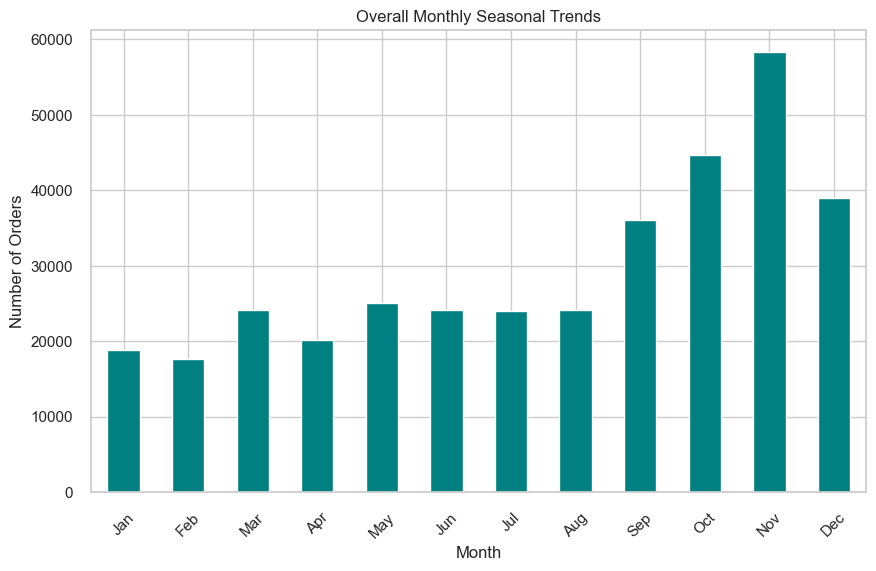

In [120]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting month for seasonal analysis (ignoring the year)
df['Month'] = df['InvoiceDate'].dt.month

# Aggregating data for monthly trends over the entire timeframe
overall_monthly_trends = df.groupby('Month').size()

# Visualization
plt.figure(figsize=(10, 6))
overall_monthly_trends.plot(kind='bar', color='teal')
plt.title('Overall Monthly Seasonal Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

## 5. Geographical Analysis

**The top 5 countries with the highest number of orders**

In [121]:
# the top 5 countries with the highest number of orders
country_orders = df.groupby('Country')['CustomerID'].count().reset_index()
country_orders.rename(columns={'CustomerID':'Number of orders'},inplace=True)
top_5_cnt = country_orders.sort_values(by='Number of orders',ascending=False)[:5]
top_5_cnt

,Country,Number of orders
35,United Kingdom,320247
14,Germany,7980
13,France,7380
10,EIRE,5992
30,Spain,2175


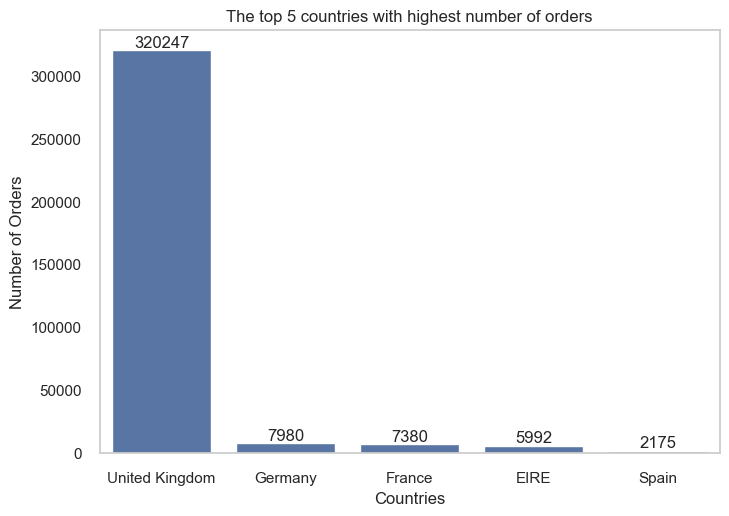

In [122]:
# Visualization of top 5 countries with highest number of orders
sns.barplot(data=top_5_cnt,x='Country',y='Number of orders')
for index, value in enumerate(top_5_cnt['Number of orders']):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.title('The top 5 countries with highest number of orders')
plt.xlabel('Countries')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.show();

**correlation between the country of the customer and the average order value**

In [123]:
# the country of the customer and the average order value
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

cust_od = df.groupby('Country')['Total_Amount'].mean().reset_index()
cust_od.rename(columns={'Total_Amount':'Average order val'},inplace=True)
cust_od.head()

,Country,Average order val
0,Australia,32.864146
1,Austria,19.671917
2,Bahrain,22.572727
3,Belgium,17.233345
4,Brazil,31.238710


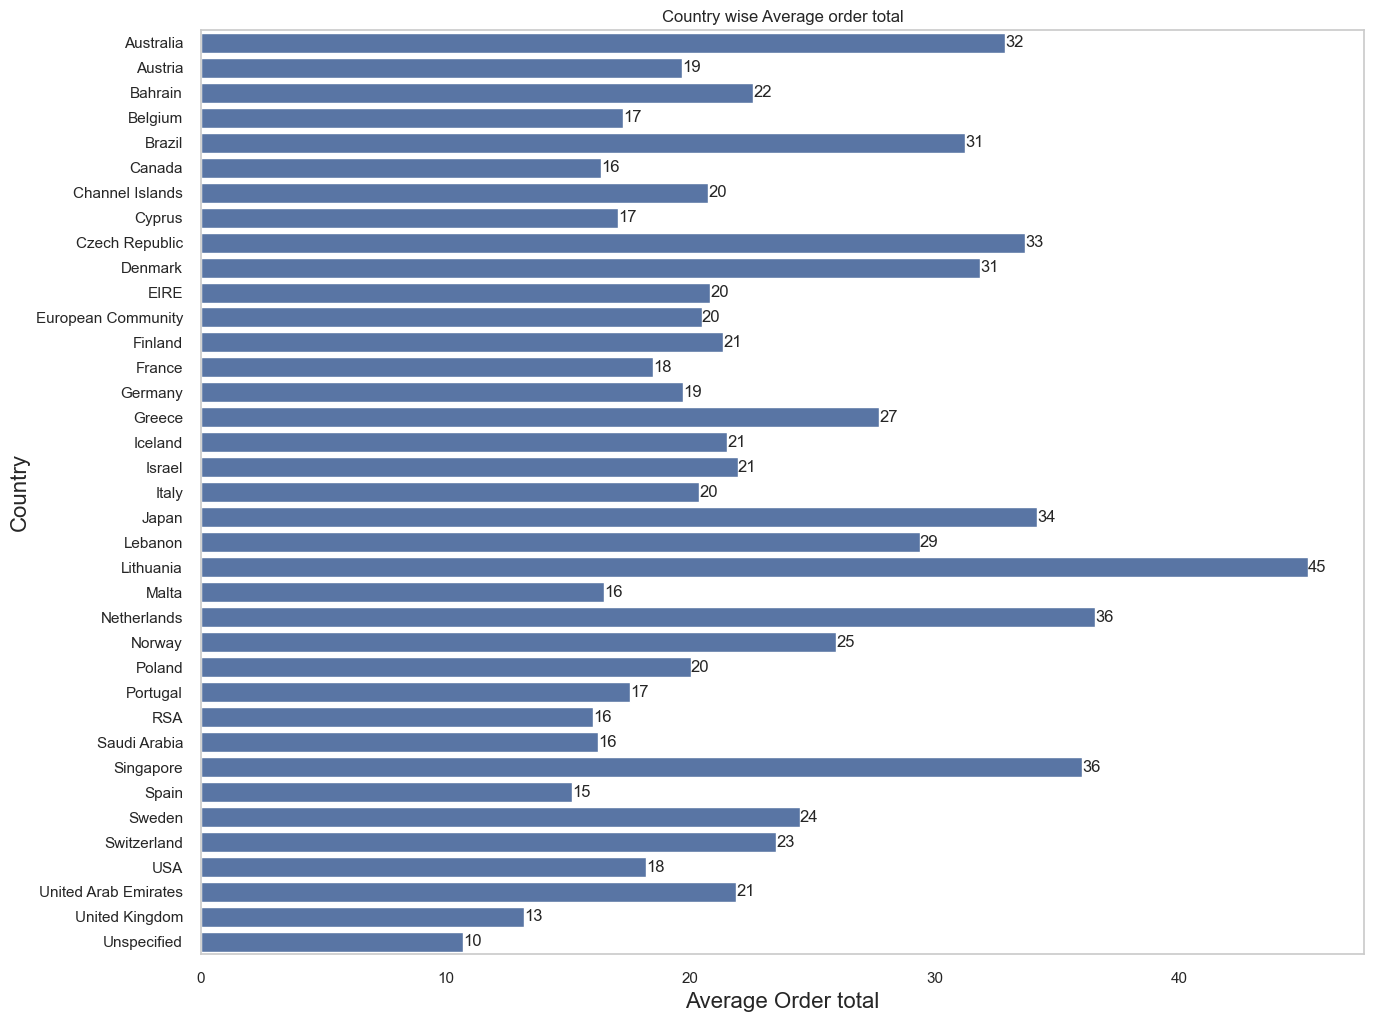

In [124]:
# bar chart of country wise average order value
plt.figure(figsize=(15,12))
cust_plt = sns.barplot(data=cust_od, x='Average order val',y='Country',orient='h')
for bar in cust_plt.patches:
    plt.text(
     bar.get_width(),
     bar.get_y() + bar.get_height() / 2,
     f'{int(bar.get_width())}',
     va='center')
    
plt.title('Country wise Average order total')
plt.xlabel('Average Order total', fontsize = 16)
plt.ylabel('Country', fontsize = 16)
plt.grid(False)
plt.show();

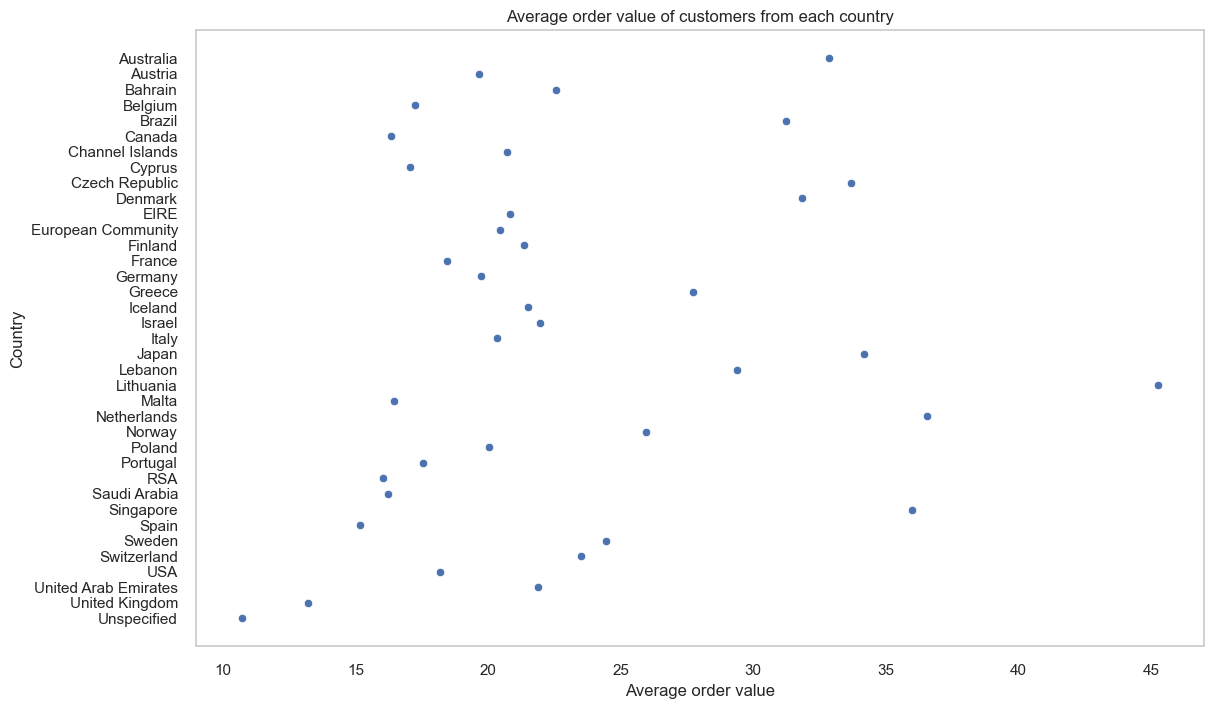

In [125]:
# scatter chart of country wise average order value
plt.figure(figsize=(13,8))
sns.scatterplot(data=cust_od,x='Average order val',y='Country')
plt.xlabel('Average order value')
plt.ylabel('Country')
plt.title('Average order value of customers from each country')
plt.grid(False)
plt.show();

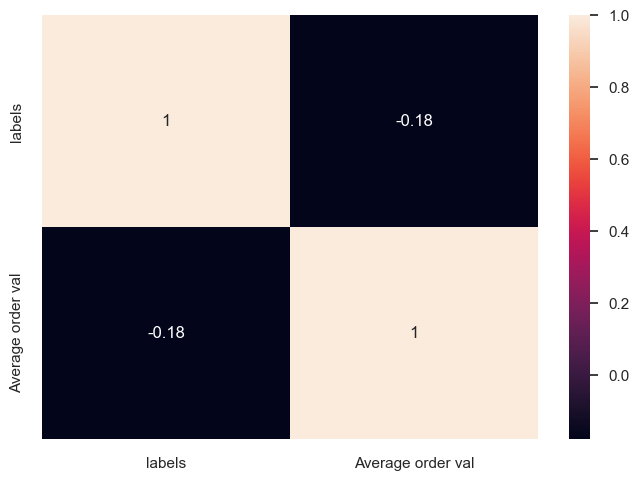

In [126]:
# heatmap to visualise correlation between the country of the customer and the average order value
from pandas import factorize

labels, categories = factorize(cust_od["Country"])
cust_od["labels"] = labels
corr_matrix = cust_od[['labels','Average order val']].astype(float).corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True)
plt.show();

**We can conclude from the bar chart, scatter plot and heatmap generated that there is minimal to no correlation (-0.1) between the country of the customer and the average order value**

## 6. Payment Analysis

Unfortunately, there isn't enough data available to provide insights into questions related to payment analysis. The specific details about the most common payment methods used by customers and any potential relationship between payment methods and order amounts are not available for analysis. As a result, without adequate information on payment-related data, it's challenging to draw meaningful conclusions or explanations regarding these aspects of customer behaviour.

## 7. Customer Behavior

- How long, on average, do customers remain active (between their first and last purchase)?

In [127]:
# Group by customer ID and calculate the duration of customer activity
cust_duration = df.groupby('CustomerID')['InvoiceDate'].apply(lambda x:(x.max()-x.min()).days).reset_index()
cust_duration.rename(columns={'InvoiceDate':'Active_duration'},inplace=True)

# average duration of customer activity
avg_cust_duration = round(cust_duration['Active_duration'].mean())

print(f'The Average active Duration of Customer: {avg_cust_duration} days')

The Average active Duration of Customer: 129 days


**Conclusion: On Average, The Customers remain active for 130 days**

- Are there any customer segments based on their purchase behavior?

## Analyzing customer segments

**1) Checking the customers based on their activity duration**

In [128]:
cust_duration.sample(6)

,CustomerID,Active_duration
2070,15232.0,27
3229,16856.0,0
666,13253.0,182
1559,14513.0,82
3007,16555.0,74
1187,13993.0,287


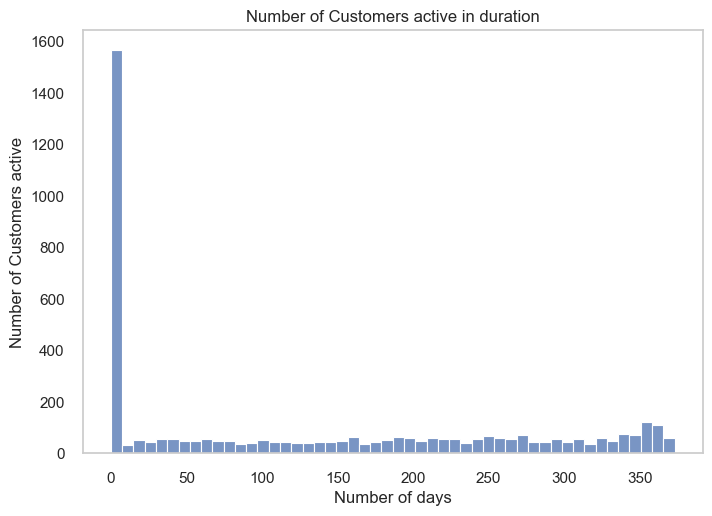

In [129]:
# histogram of active duration of customers
sns.histplot(cust_duration['Active_duration'],bins=50)
plt.xlabel('Number of days')
plt.ylabel('Number of Customers active')
plt.title('Number of Customers active in duration')
plt.grid(False)
plt.show();

**Data seems to be an skewed, Removing the customers who only has bought once that means active duration is 0**

In [130]:
# for better understanding of data removing the customers who has bought only once
one_time_cust = cust_duration[cust_duration['Active_duration']==0]
mask = cust_duration['Active_duration']==0
cust_duration_1 = cust_duration[~mask]

In [131]:
print(one_time_cust.shape)
print(cust_duration_1.shape)

(1533, 2)
(2682, 2)


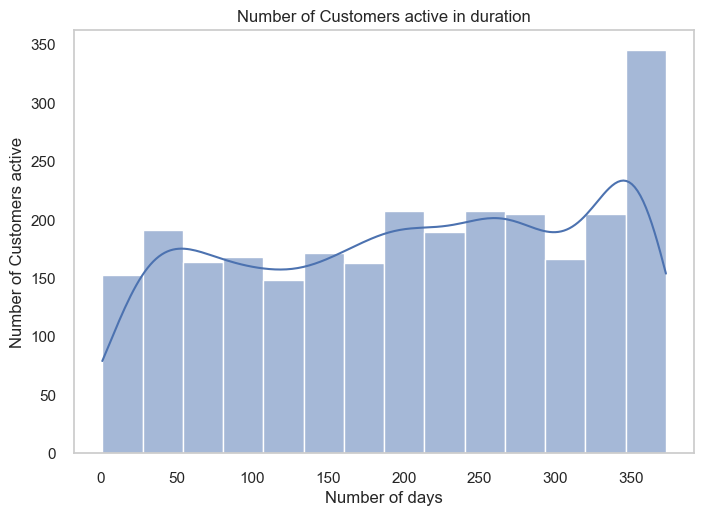

In [132]:
# histogram of active duration of customers (removing 1 time customers)
sns.histplot(cust_duration_1['Active_duration'],bins=14,kde=True)
plt.xlabel('Number of days')
plt.ylabel('Number of Customers active')
plt.title('Number of Customers active in duration')
plt.grid(False)
plt.show();

**Data seems to be distributed fairly now**

**2) Customer segmentation based on the RFM score. Ranking the customers based on the RFM score calculated**

Calculating the Recency, Frequency, Monetary for all customers

In [133]:
# calculate RFM matrix
curr_date = df['InvoiceDate'].max()

# Recency of each customer
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (curr_date - recency['InvoiceDate']).dt.days

# frequency of each customer
frequency = df.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Monetary value of each customer
monetary = df.groupby('CustomerID')['Total_Amount'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

In [134]:
# Merging of dataframes to get RFM matrix for each customers
rfm = pd.merge(recency[['CustomerID','Recency']],frequency,on='CustomerID')
rfm = pd.merge(rfm,monetary,on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,174,3743.43
1,12348.0,248,6,90.20
2,12349.0,18,66,1287.15
3,12350.0,309,16,294.40
4,12352.0,35,71,1232.44


Assigning rank to each customer based on the RFM score 

In [135]:
# assigning rank to each customer based on the RFM score
r, f, m = range(10, 0, -1), range(1,11), range(1,11)

rfm['r_score'] = pd.qcut(rfm['Recency'], q=10, labels=r).astype(int)
rfm['f_score'] = pd.qcut(rfm['Frequency'], q=10, labels=f).astype(int)
rfm['m_score'] = pd.qcut(rfm['Monetary'], q=10, labels=m).astype(int)

rfm['rfm_sum'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']

In [136]:
cust_rating = rfm.sort_values(by='rfm_sum',ascending=False)
cust_rating.sample(6)

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_sum
3594,17398.0,114,31,460.48,3,5,5,13
920,13611.0,88,70,1072.80,4,7,8,19
1638,14626.0,23,113,2345.52,7,9,9,25
1459,14383.0,37,52,1021.67,6,6,7,19
2132,15315.0,63,34,505.46,5,5,5,15
4177,18229.0,11,138,5203.28,9,9,10,28


Assigning label to each customer, based on the RFM score calculated.

In [137]:
# function to assign label to each customer based on RFM score calculated
def assign_label(x):
    if x >= 25:
        return 'High value customer'
    elif x>=15 and x<25:
        return 'Medium value customer'
    else:
        return 'Low value customer'

cust_rating['Rating'] = cust_rating['rfm_sum'].apply(assign_label)
cust_rating.sample(6)

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_sum,Rating
2979,16511.0,21,151,757.68,8,9,7,24,Medium value customer
3583,17383.0,3,49,193.39,10,6,3,19,Medium value customer
1581,14540.0,9,68,902.41,9,7,7,23,Medium value customer
1147,13938.0,34,7,71.66,6,1,1,8,Low value customer
1410,14309.0,7,107,1783.45,9,8,9,26,High value customer
3223,16848.0,52,14,281.42,5,3,3,11,Low value customer


Analyzing customer segments we formed

In [138]:
# Displaying the the scores segment wise
ratings = cust_rating.groupby('Rating').agg({'CustomerID':'count',
                                                       'Recency':'mean',
                                                       'Frequency':'mean',
                                                       'Monetary':'sum'}).reset_index()
ratings.rename(columns={'Rating':'Customer segment','CustomerID':'Total Customers'},inplace=True)
ratings

,Customer segment,Total Customers,Recency,Frequency,Monetary
0,High value customer,753,11.492696,279.146082,2912699.210
1,Low value customer,1794,160.557414,17.123188,445507.182
2,Medium value customer,1668,52.863909,69.067746,1597913.812


**Normalising the Total customers and Monetary columns to get better interpretation of each customer segment and their contribution**

In [139]:
ratings['Customers (%)'] = (ratings['Total Customers']/ratings['Total Customers'].sum())*100
ratings['Monetary (%)'] = (ratings['Monetary']/ratings['Monetary'].sum())*100
ratings['Monetary'] = ratings['Monetary'] / ratings['Total Customers']
ratings.drop(columns='Total Customers',inplace=True)
ratings.round(2)

,Customer segment,Recency,Frequency,Monetary,Customers (%),Monetary (%)
0,High value customer,11.49,279.15,3868.13,17.86,58.77
1,Low value customer,160.56,17.12,248.33,42.56,8.99
2,Medium value customer,52.86,69.07,957.98,39.57,32.24


The high value customer segment contributes most in terms of Money spending.

- **High value customers -** 
The 17.84% Customers of the total customers spends 58.53 % of the total money. Each High valued customer on average spends 3857 $.
 
- **Medium value customers -** 
The 39.53% Customers of the total customers spends 32.46 % of the total money. Each Medium valued customer on average spends 965 $.

- **Low value customers -** 
The 42.63% Customers of the total customers spends 9.02 % of the total money. Each Low valued customer on average spends 248 $.

**Scatter Plot to visualize the customer segments.**
- Low valued customers: low Frequecy and high Recency
- Medium valued customers: Medium Frequecy and Medium Recency
- High valued customers: High Frequecy and Low Recency

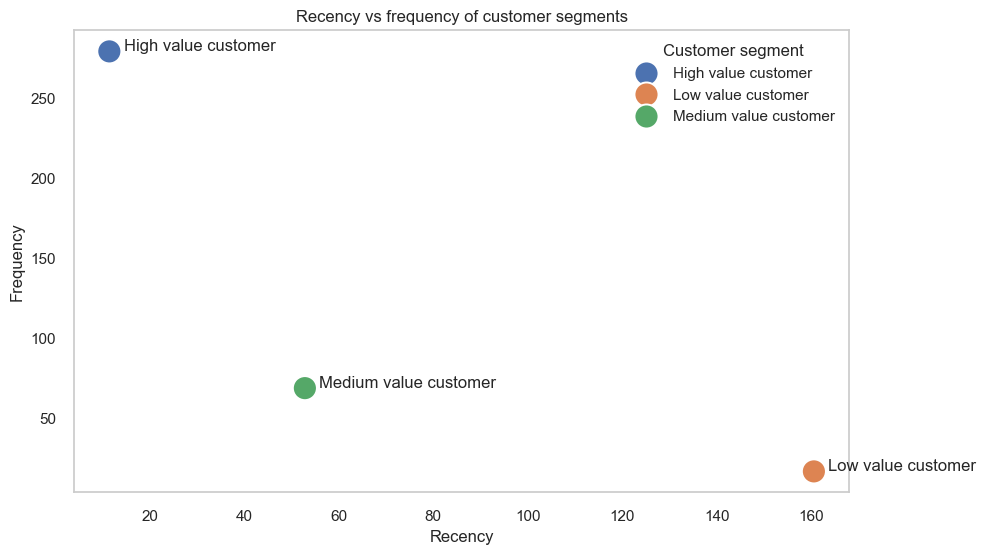

In [140]:
# Scatter Plot to visualize the customer segments
fig, ax = plt.subplots(figsize=(10,6))
plot = sns.scatterplot(x='Recency', y='Frequency', data=ratings, hue='Customer segment', s=300)

for i in range(len(ratings)):
     plot.text(ratings['Recency'][i]+3,
               ratings['Frequency'][i],
               ratings['Customer segment'][i])

ax.set_title('Recency vs frequency of customer segments')
plt.grid(False)
plt.show()

**3) Applying Clustering method to analyze the customer segments** 

K-Means Clustering: It is a Non-parametric approach that groups the data points based on their similarity or closeness to each other and then forms K clusters from n observations. 

Standardising the data:

In [141]:
# Standardising the data
from sklearn.preprocessing import StandardScaler

rfm = rfm[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [142]:
rfm_data = pd.DataFrame(rfm_scaled,columns=['Recency','Frequency','Monetary'])
rfm_data.head()

,Recency,Frequency,Monetary
0,-0.903680,0.426491,0.991960
1,1.567910,-0.373974,-0.419419
2,-0.733570,-0.088094,0.043007
3,2.178302,-0.326328,-0.340529
4,-0.563461,-0.064271,0.021871


**Finding the optimal number of clusters using silhouette score** 

The Silhouette score for 3 cluster is: 0.5539352554820048
The Silhouette score for 4 cluster is: 0.5930336618519508
The Silhouette score for 5 cluster is: 0.5930065332250419
The Silhouette score for 6 cluster is: 0.5690377361529451
The Silhouette score for 7 cluster is: 0.4676275335029238
The Silhouette score for 8 cluster is: 0.4381991522219885
The Silhouette score for 9 cluster is: 0.46210482151841614
The Silhouette score for 10 cluster is: 0.4623138966463448


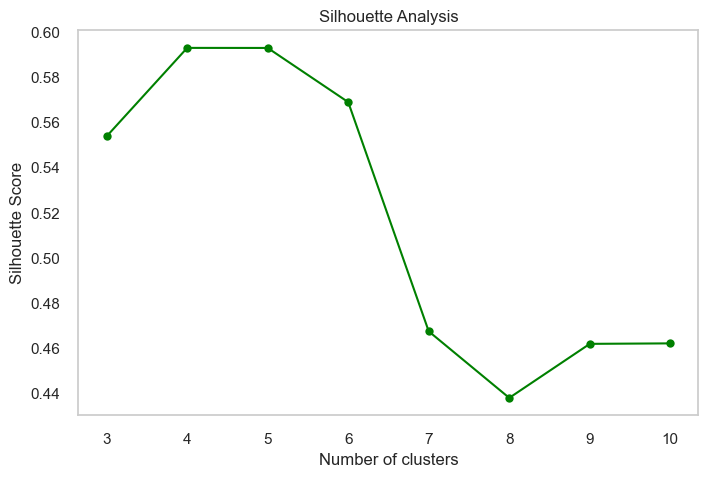

In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#from yellowbrick.cluster import silhouette_visualizer

clusters = [3,4,5,6,7,8,9,10]
Silhouette_score = []
#silhouette_score = silhouette_score(rfm_data)

for n_cluster in clusters:
    kmeans = KMeans(n_clusters=n_cluster,random_state=10)
    labels = kmeans.fit_predict(rfm_data)
    
    score = silhouette_score(rfm_data,labels)
    Silhouette_score.append(score)
    print(f'The Silhouette score for {n_cluster} cluster is: {score}')
    silhouette_val = silhouette_samples(rfm_data, labels)

# Plotting silhouette scores
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(clusters, Silhouette_score, marker='o',linestyle='-',color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(False)
plt.show()

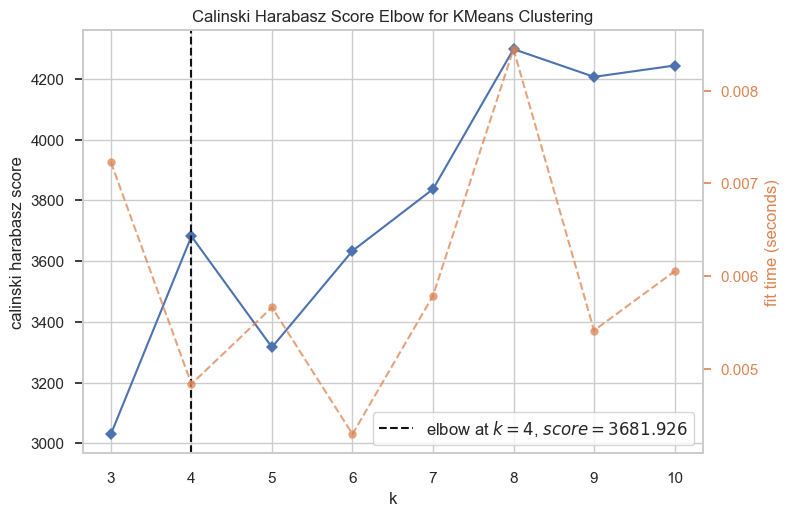

In [144]:
# plot for elbow method (finding the optimal number of clusters)
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11), metric='calinski_harabasz')
visualizer.fit(rfm_data)   
visualizer.show();   

**As we can see elbow forms around 4, According to elbow method we can conclude that Optimal value for k is 4**

In [145]:
from sklearn.cluster import KMeans

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_data)
rfm_data.head()

,Recency,Frequency,Monetary,Cluster
0,-0.903680,0.426491,0.991960,0
1,1.567910,-0.373974,-0.419419,1
2,-0.733570,-0.088094,0.043007,0
3,2.178302,-0.326328,-0.340529,1
4,-0.563461,-0.064271,0.021871,0


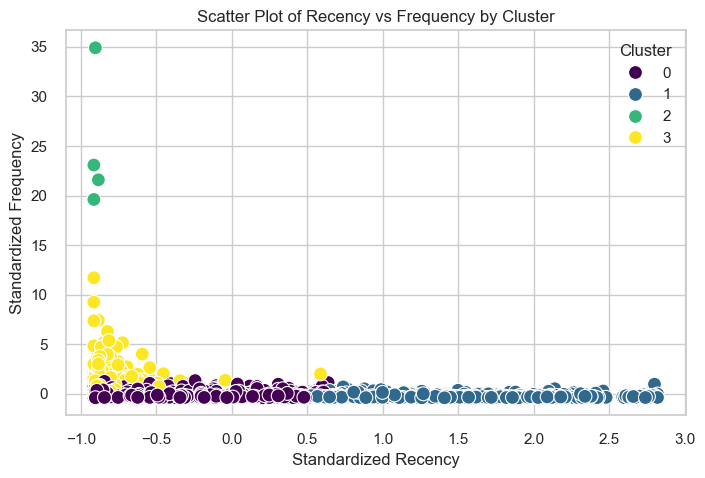

In [146]:
# scatter plot of clusters formed by K-Means clustering 
import seaborn as sns
sns.set(style="whitegrid")

# Plot a scatter plot for Recency and Frequency using standardized scales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_data, palette='viridis', s=100)
plt.title('Scatter Plot of Recency vs Frequency by Cluster')
plt.xlabel('Standardized Recency')
plt.ylabel('Standardized Frequency')
plt.show()

In [147]:
# scores for each cluster formed
clust = rfm_data.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'}).reset_index()
print(clust)

   Cluster   Recency  Frequency   Monetary
0        0 -0.483251  -0.081227  -0.091080
1        1  1.564106  -0.279262  -0.317293
2        2 -0.903680  24.791850  18.466599
3        3 -0.784718   1.640494   1.999593


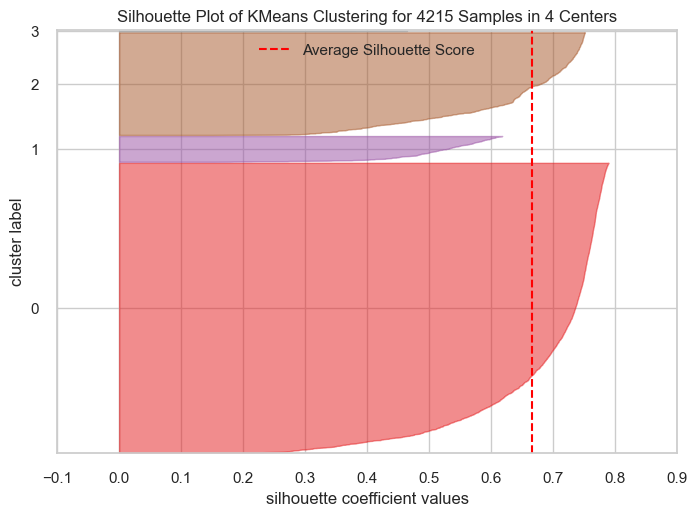

In [148]:
#  plot of clustering model 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(rfm_data)    
visualizer.show();

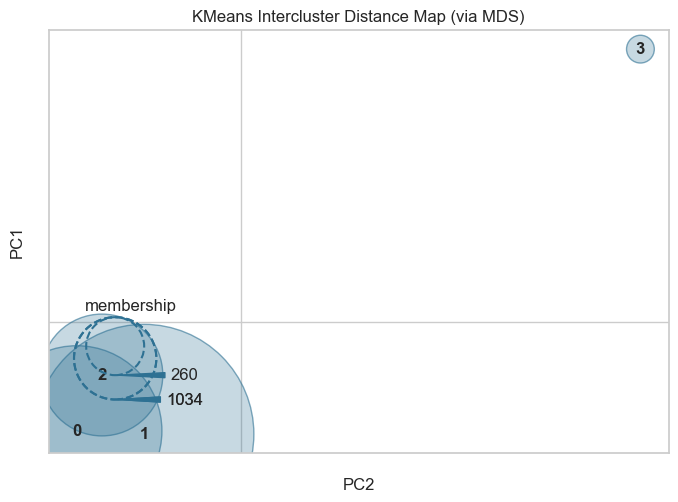

In [149]:
# Plot to visualize intercluster distance
model = KMeans(4)
visualizer = InterclusterDistance(model)
visualizer.fit(rfm_data)        
visualizer.show();

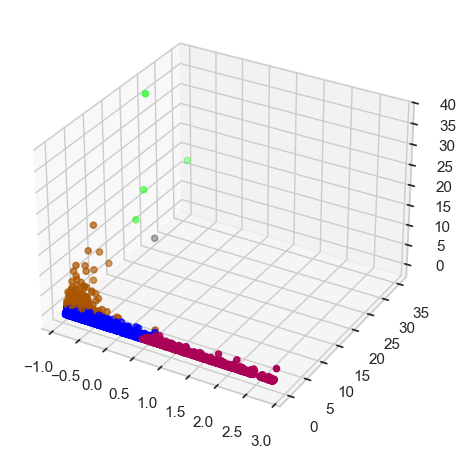

In [150]:
# 3D scatter plot visualize clusters
model = KMeans(4,random_state=42)
model.fit(rfm_data)
centers = model.cluster_centers_
predict = model.predict(rfm_data)
figure = plt.figure()
ax = figure.add_subplot(111,projection='3d')
ax.scatter(rfm_data['Recency'],rfm_data['Frequency'],rfm_data['Monetary'],cmap='brg',c=predict)
ax.scatter(centers[:,0],centers[:,1],c='black');

In [151]:
pip install nbformat --upgrade


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [152]:
# 3D interactive scatter plot visualize clusters
model = KMeans(4,random_state=42)
model.fit(rfm_data)
centers = model.cluster_centers_
predict = model.predict(rfm_data)

fig = px.scatter_3d(rfm_data, x='Recency', y='Frequency', z='Monetary',color=predict)
fig.show()

**References**

https://www.scikit-yb.org/en/latest/api/cluster/index.html - Clustering Visualizers using Yellowbrick 

## 8) Returns and Refunds

In [153]:
df_heatmap = pd.read_csv('data.csv',encoding='unicode_escape')
has_returns = df_heatmap[df_heatmap['InvoiceNo'].str.startswith('C')].shape[0] > 0
 
if has_returns:
    total_orders = df_heatmap['InvoiceNo'].nunique()
    returned_orders = df_heatmap[df_heatmap['InvoiceNo'].str.startswith('C')]['InvoiceNo'].nunique()
 
    percentage_returns = (returned_orders / total_orders) * 100
 
    print(f"The percentage of orders that have experienced returns or refunds is: {percentage_returns:.2f}%")
else:
    print("No returns or refunds found in the dataset.")

The percentage of orders that have experienced returns or refunds is: 14.81%


In [154]:
returned_orders1 = df_heatmap[df_heatmap['InvoiceNo'].str.startswith('C')]['InvoiceNo']
returned_orders1

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 9288, dtype: object

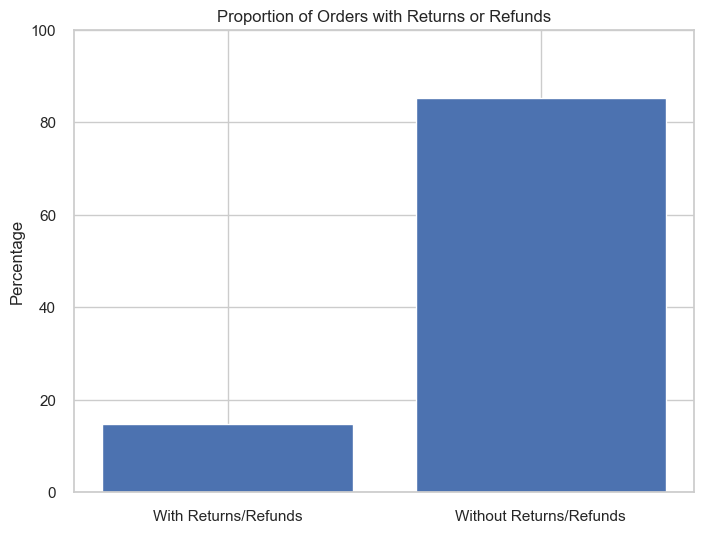

In [155]:
# Plot: Bar Plot - Proportion of Orders with Returns or Refunds
plt.figure(figsize=(8, 6))
plt.bar(['With Returns/Refunds', 'Without Returns/Refunds'], 
        [percentage_returns, 100 - percentage_returns])
plt.title('Proportion of Orders with Returns or Refunds')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

In [156]:
categories = {
    'Home Decor': ['holder', 'lantern', 'hanger', 'candle', 'light', 'frame', 'drawer', 'cabinet', 'doormat', 'night light', 'coat rack'],
    'Kitchen and Dining': ['mug', 'teaspoon', 'recipe box', 'lunch box', 'tea towel', 'cutlery set', 'cake cases', 'teapot', 'milk jug', 'beaker', 'saucer', 'tea cosy'],
    'Toys and Games': ['jigsaw', 'sticker sheet', 'card game', 'snakes & ladders', 'toy tidy'],
    'Fashion and Accessories': ['parasol', 'bag', 'shoulder bag', 'wallet', 'purse', 'umbrella'],
    'Crafts and Hobbies': ['feltcraft', 'paint set', 'sewing box', 'sticker', 'balloon art', 'craft kit'],
    'Stationery and Office': ['paper chain kit', 'notebook', 'calendar', 'diary', 'photo clip', 'metal sign', 'calculator'],
    'Utility and Storage': ['hot water bottle', 'storage bag', 'recycling bag', 'tool set', 'hanger', 'hook'],
    'Seasonal and Holiday': ['Christmas', 'Easter', 'Valentine', 'Halloween'],
    'Miscellaneous': []
}

def categorize_product(description):
    # Check if the description is not a string (e.g., NaN or float)
    if not isinstance(description, str):
        return 'Miscellaneous'  # Or any other default category you prefer

    for category, keywords in categories.items():
        if any(keyword in description.lower() for keyword in keywords):
            return category
    return 'Miscellaneous'


# Apply the categorization function
df_heatmap['Product Category'] = df_heatmap['Description'].apply(categorize_product)

In [157]:
df_heatmap.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Home Decor
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Home Decor
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Home Decor
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Utility and Storage
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Miscellaneous


In [158]:
returned_orders1 = df_heatmap[df_heatmap['InvoiceNo'].str.startswith('C')]['InvoiceNo']
len(returned_orders1)

9288

In [159]:
category_counts = df_heatmap['Product Category'].value_counts()

print(category_counts)

Product Category
Miscellaneous              327503
Home Decor                  70165
Fashion and Accessories     62209
Kitchen and Dining          34857
Stationery and Office       21025
Utility and Storage         12416
Crafts and Hobbies           9815
Toys and Games               3919
Name: count, dtype: int64


In [160]:
returned_orders = df_heatmap[df_heatmap['InvoiceNo'].str.startswith('C')]['InvoiceNo']

# Add a 'Returns' column to df_heatmap
df_heatmap['Returns'] = df_heatmap['InvoiceNo'].apply(lambda x: 1 if x in returned_orders.values else 0)

# Display the DataFrame to check the new column
print(df_heatmap.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country     Product Category  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom           Home Decor   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom           Home Decor   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom           Home Decor   
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  Utility and Storage   
4  12/1/2010 8:26       3.39     17850.0  United Kingdom        Miscellaneous   

   Returns  
0        0  
1        0  
2        0  
3        0  
4        0  


In [161]:
category_stats = df_heatmap.groupby('Product Category').agg(
    total_count=('Returns', 'count'),
    total_returns=('Returns', 'sum')
)

category_stats['return_rate'] = (category_stats['total_returns'] / category_stats['total_count']) * 100

print(category_stats['return_rate'])

Product Category
Crafts and Hobbies         1.355069
Fashion and Accessories    1.322960
Home Decor                 2.297442
Kitchen and Dining         2.131566
Miscellaneous              1.707160
Stationery and Office      0.784780
Toys and Games             1.377903
Utility and Storage        1.345039
Name: return_rate, dtype: float64


In [162]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_heatmap['Product Category'], df_heatmap['Returns'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

# Interpret the results
if p < 0.05:
    print("There is a significant correlation between product category and likelihood of returns.")
else:
    print("There is no significant correlation between product category and likelihood of returns.")


Chi-Square Statistic: 362.3574646761565, p-value: 2.7846387843345366e-74
There is a significant correlation between product category and likelihood of returns.


In [163]:
df_heatmap = df_heatmap[df_heatmap['Product Category'] != 'Miscellaneous']
df_heatmap.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product Category,Returns
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Home Decor,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Home Decor,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Home Decor,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Utility and Storage,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,Home Decor,0


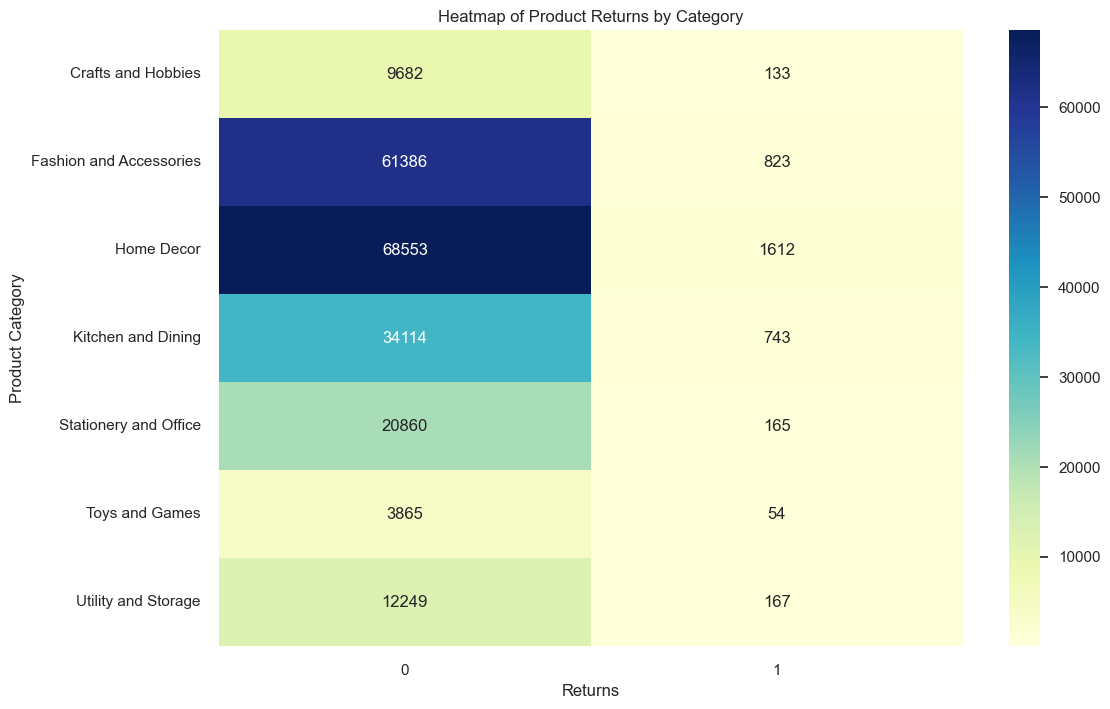

In [164]:
contingency_table = pd.crosstab(df_heatmap['Product Category'], df_heatmap['Returns'])

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")

plt.title('Heatmap of Product Returns by Category')
plt.xlabel('Returns')
plt.ylabel('Product Category')
plt.show()

## 9) Profitability Analysis

since we do not have sufficient data to calculate the total profit earned by the company in dataset's time period,  we have calculated total revenue generated in this time period

In [165]:
# Calculate the total profit generated by the company during the dataset's time period
# since
df['Profit'] = df['Quantity'] * df['UnitPrice']
total_profit = df['Profit'].sum()

print(f"The total profit generated by the company is: {total_profit:.2f}")

# top 5 products with the highest profit margins?
top_profitable_products = df.groupby('Description')['Profit'].sum().sort_values(ascending=False).head(5)

print("Top 5 most profitable products:")
print(top_profitable_products)

The total profit generated by the company is: 4956120.20
Top 5 most profitable products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    51472.01
PARTY BUNTING                         35457.75
ASSORTED COLOUR BIRD ORNAMENT         28255.11
JUMBO BAG RED RETROSPOT               28077.10
SPOTTY BUNTING                        24088.75
Name: Profit, dtype: float64


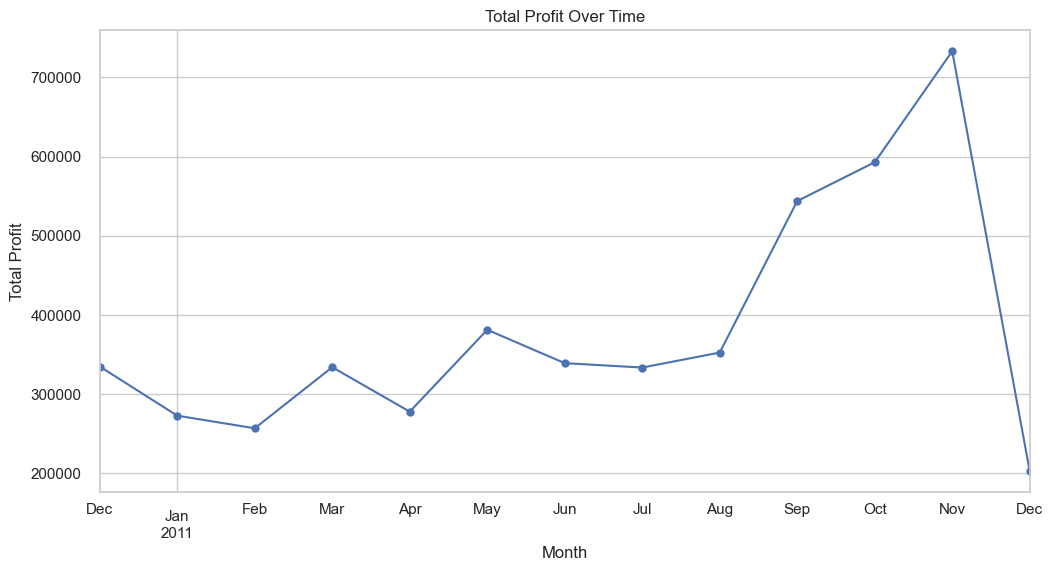

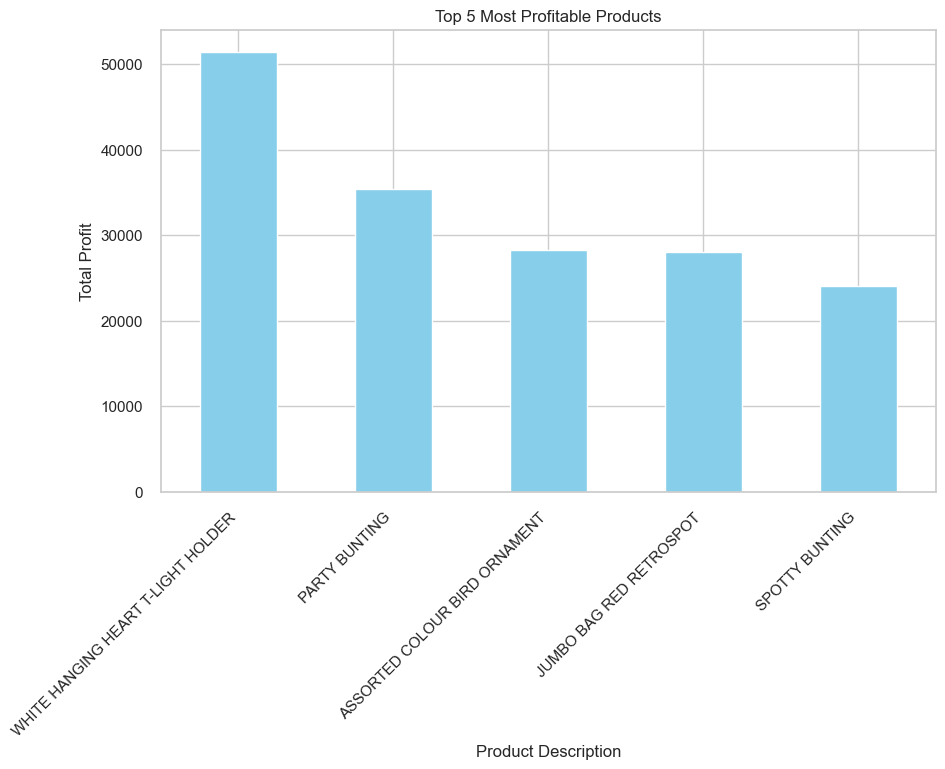

In [166]:
# Plot 1
df_time = df.groupby(pd.to_datetime(df['InvoiceDate']).dt.to_period("M")).agg({'Profit': 'sum'})
plt.figure(figsize=(12, 6))
df_time['Profit'].plot(marker='o')
plt.title('Total Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# Plot 2
plt.figure(figsize=(10, 6))
top_profitable_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Profitable Products')
plt.xlabel('Product Description')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.show()


## 10) Customer Satisfaction

The dataset lacks a dedicated column for customer feedback, limiting insights into satisfaction and preferences. This absence hinders a comprehensive analysis of customer sentiments and their potential impact on business strategies.